# Загрузка необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy  import stats

# Анализ выборки хи квадрат с 3 степенями свободы - ${\chi}_3^2$

In [2]:
# Создаем обект распределения
chi2_3 = stats.chi2(3)

# Получаем матожидане и дисперсию
mean, var = chi2_3.stats()
mean, var

(array(3.), array(6.))

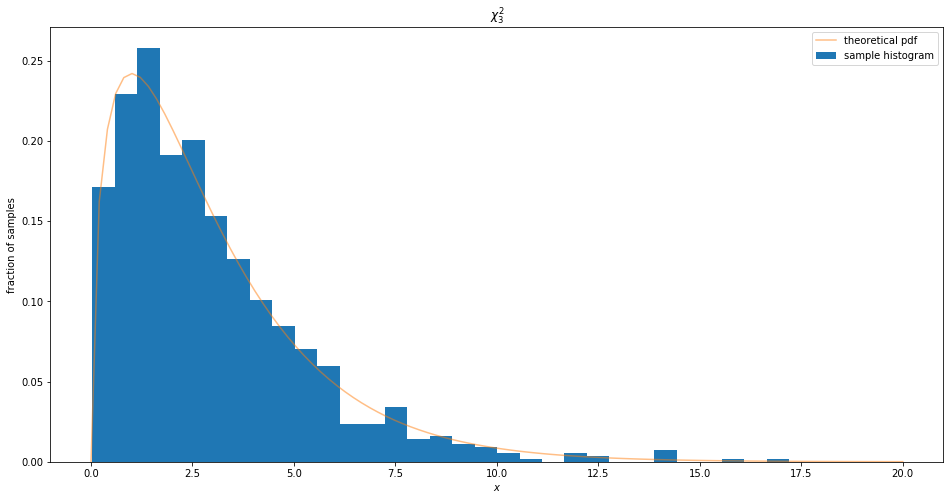

In [3]:
# Создаем пустой график
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.set_ylabel("fraction of samples")
ax.set_xlabel("$x$")
ax.set_title("${\chi}_3^2$")

# Добавляем гистограмму для выборки
sample = chi2_3.rvs(size=1000)
ax.hist(sample, density=True, label="sample histogram", bins=int(1000 ** 0.5))

# Добавляем теоретическую плотность распределения
x = np.linspace(0, 20, 100)
pdf = chi2_3.pdf(x)
ax.plot(x, pdf, label="theoretical pdf", alpha=0.5)

# Добавляем легенду
ax.legend()

# Анализ выборочной средней

In [4]:
def draw_sample_mean(sample_size, num_samples=1000, dist=chi2_3):
    """Гнерирует num_samples выборок размера sample_size и рисует необходимые графики и статистику."""

    # Создаем пустой график
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    ax.set_ylabel("$f(x)$")
    ax.set_xlabel("sample mean")
    ax.set_title(f"sample mean of {sample_size} " + "${\chi}_3^2$")

    # Добавляем гистограмму для выборки
    sample = dist.rvs(size=(num_samples, sample_size))
    sample = sample.mean(axis=1)
    ax.hist(sample, density=True, label="sample mean histogram", bins=int(num_samples ** 0.5))

    # Добавляем плотность выборочной средней согласно центральной предельной теореме
    x = np.linspace(0, 20, 1000)
    mean, var = dist.stats()
    var = var / sample_size
    pdf = stats.norm(mean, var ** 0.5).pdf(x)
    ax.plot(x, pdf, label="theoretical pdf", alpha=0.5)

    # Добавляем легенду
    ax.legend()

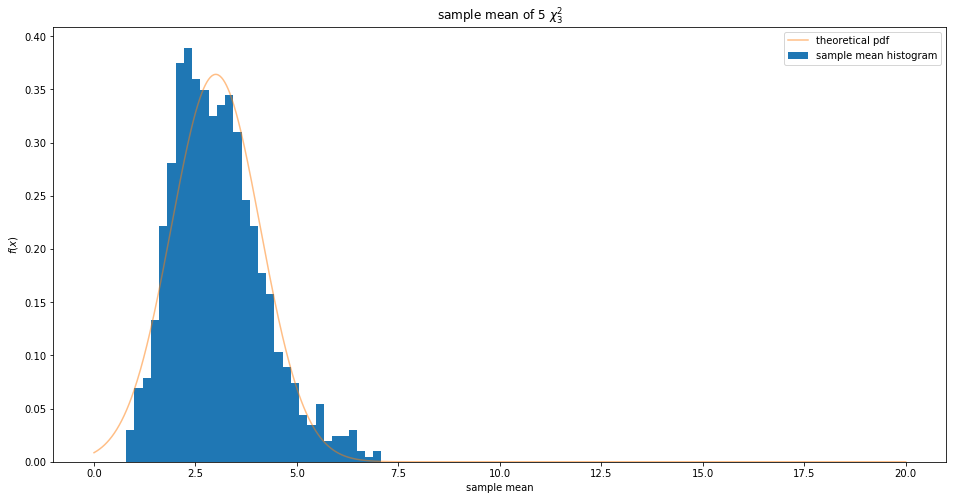

In [5]:
draw_sample_mean(5)

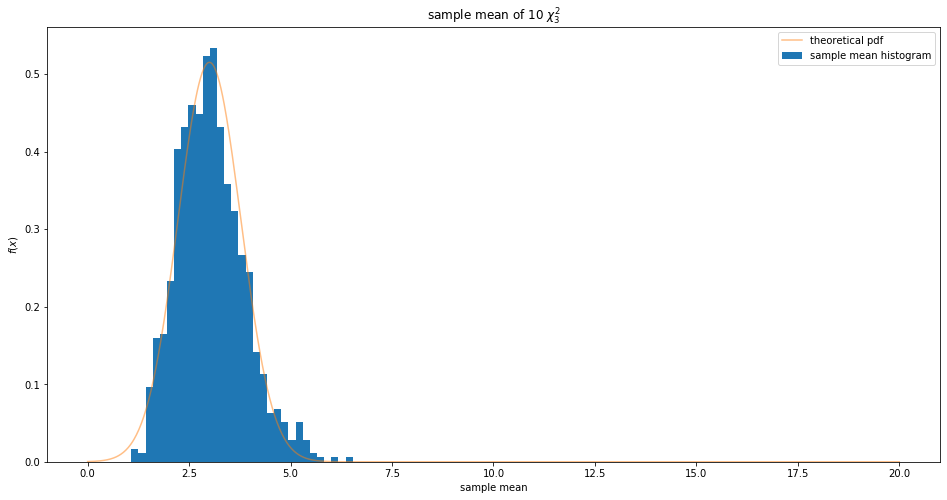

In [6]:
draw_sample_mean(10)

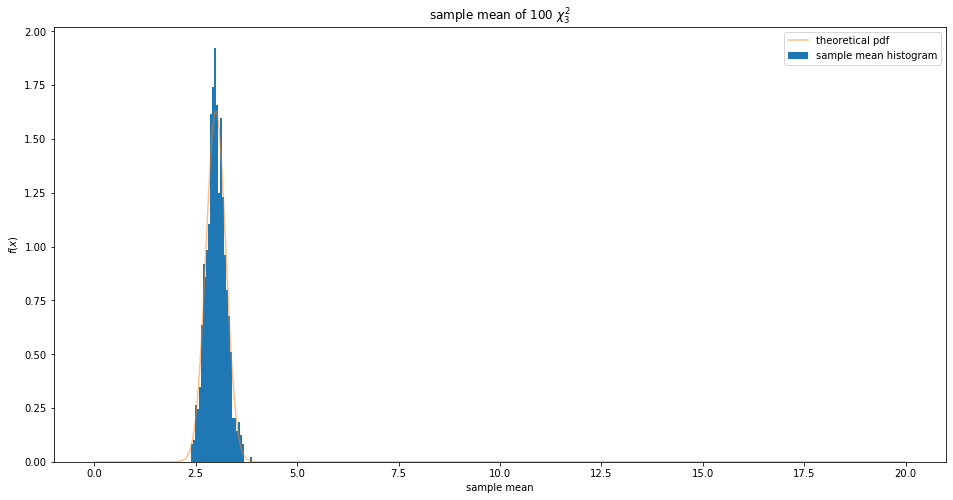

In [7]:
draw_sample_mean(100)

# Выводы

При увеличение размера выборки разброс выборочной средней постпенной снижается и сходится к теоретической срденей 3. При этом гистограмма выборочных средних постпенно приближается к предсказываемой центральной предельной теоремой нормальному распределению. Если для выборки размером 3 наблюдается видимая ассиметрия, характерная для ${\chi}_3^2$, то при выборке размером 100 она практически исчезает. 